# Final Project Notebook

The report for this final project can be found at this [link](https://cybertraining-dsc.github.io/report/fa20-523-301/project/project/).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1 Importing the functions

This file requires that we import Numpy, Matplotlib, Pylab, Keras, and Pandas

In [2]:
import numpy as np
from numpy import mean
from numpy import std

from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import pylab
import os, sys
import pandas as pd
import io
import requests
import warnings
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime


from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot

from sklearn.datasets import make_regression

! pip install cloudmesh-common -U

from cloudmesh.common.Benchmark import Benchmark

! pip install utils
! pip install lightgbm
import utils
import lightgbm

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 81kB 2.2MB/s 
     |████████████████████████████████| 133kB 4.8MB/s 
  Created wheel for python-hostlist: filename=python_hostlist-1.21-cp36-none-any.whl size=38932 sha256=f4fec7ec16f00e501266d2ad50a13deb3dc9bd4190cfb79b072f0019b45fd174
  Stored in directory: /root/.cache/pip/wheels/0b/5b/55/ddcf52288f0b10f4564ca1b2531594ff7ccc65f487ba8dc437
Successfully built python-hostlist
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Conditioned Code. Only Use this for work to save on processing.

Moved all of the files to the following [Drive Location](https://drive.google.com/drive/folders/1flPbO7Q0ID70Or_OZ4MdW6CbYDE32GeT). 

##Images fo data engineering and exploratory analysis
####Below are images taken of the code from our project_dataEngineering.ipynb of the work done prepare the data for training.  This includes transforming data across multiple tables and using keys to develop avg game metrics specific to injury and recovery dates.


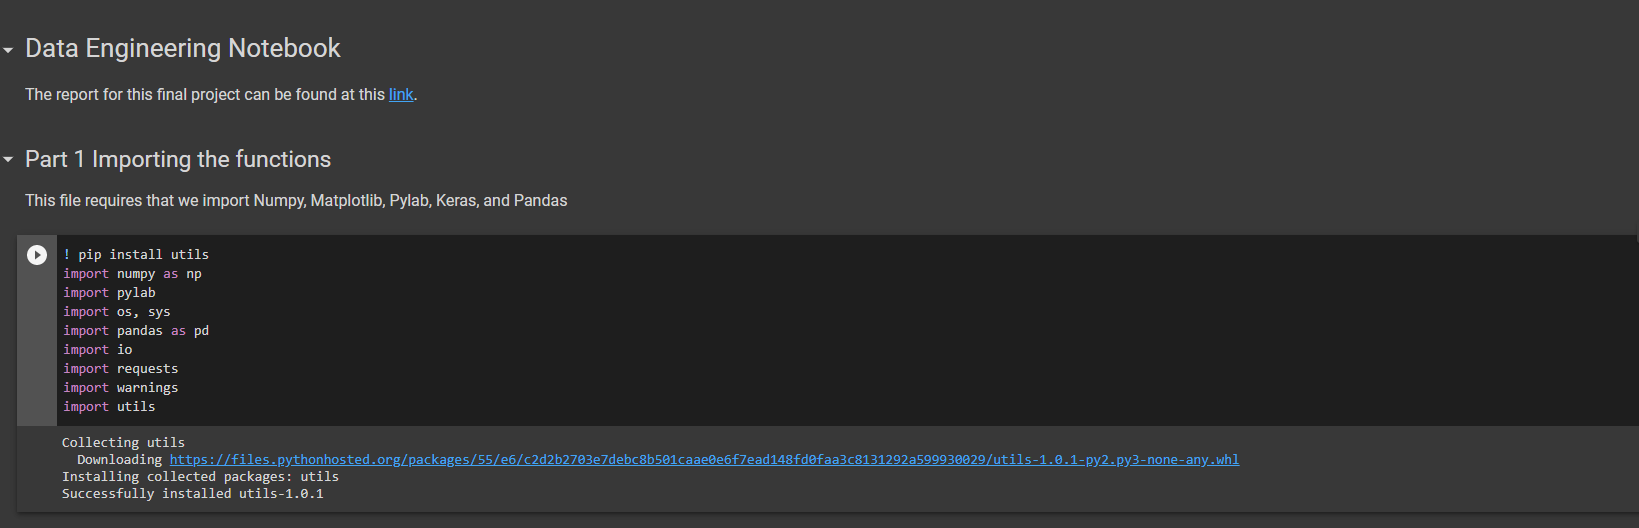

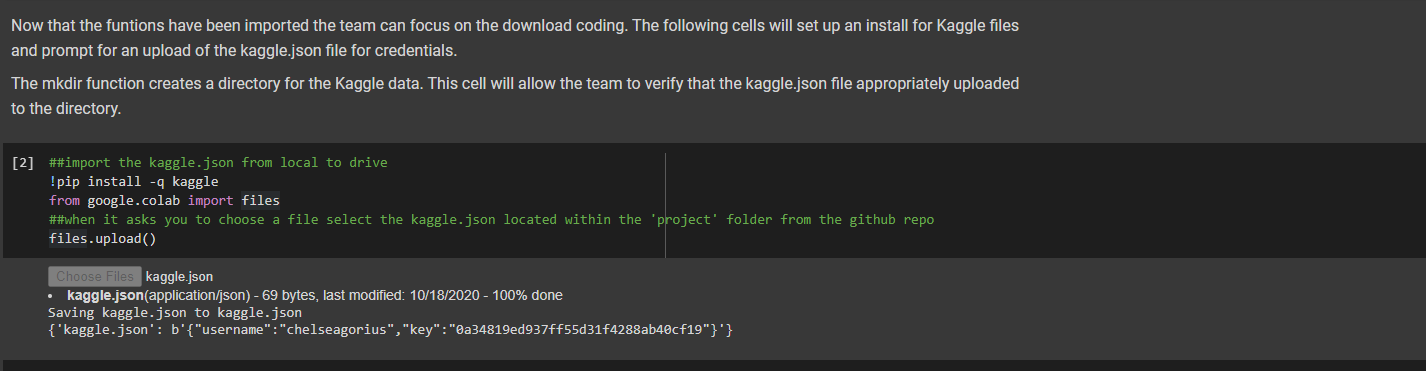

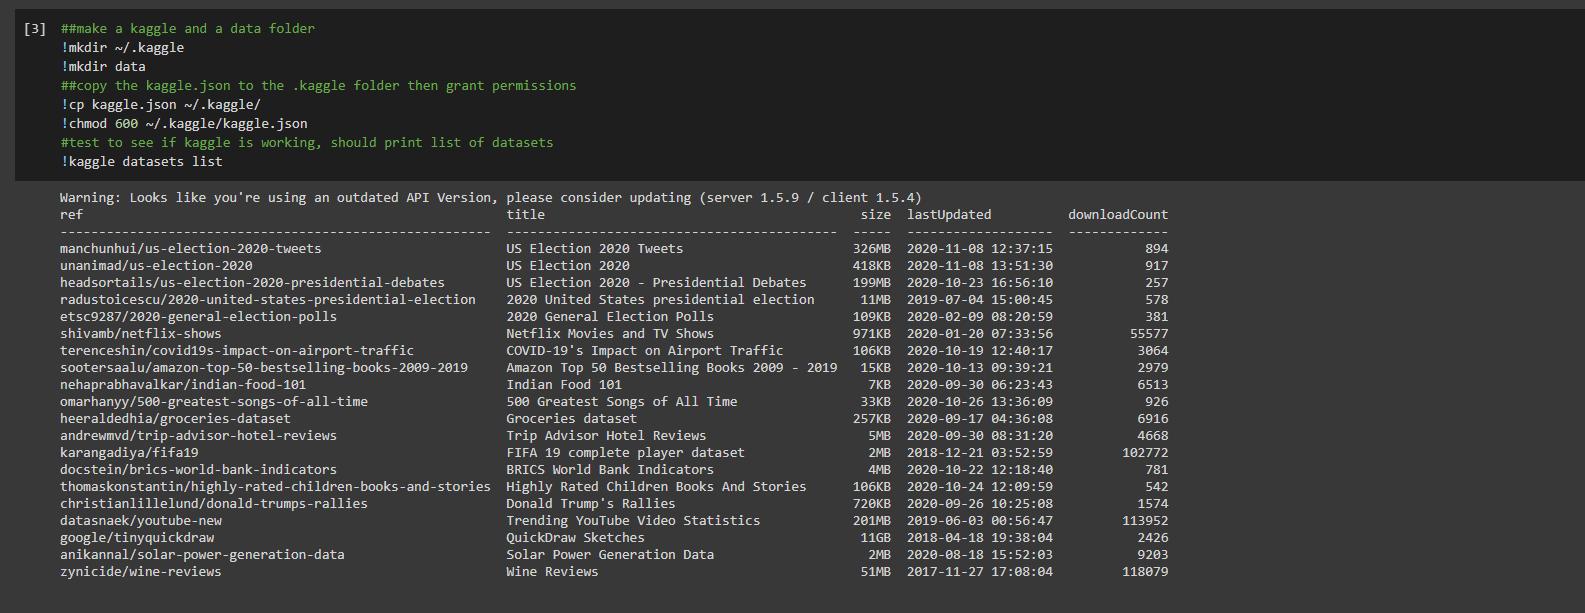

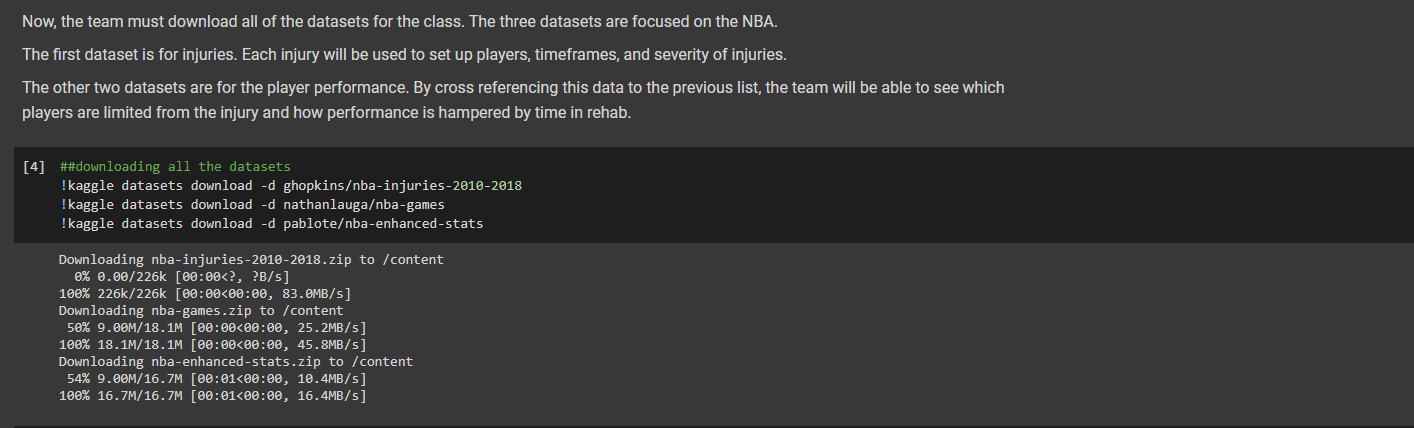

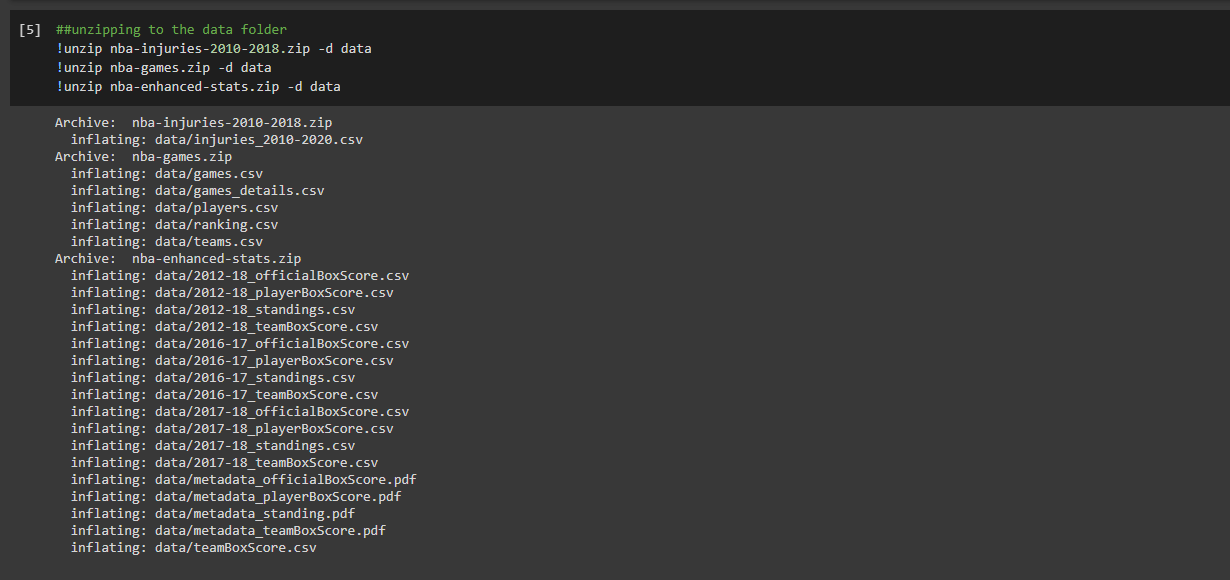

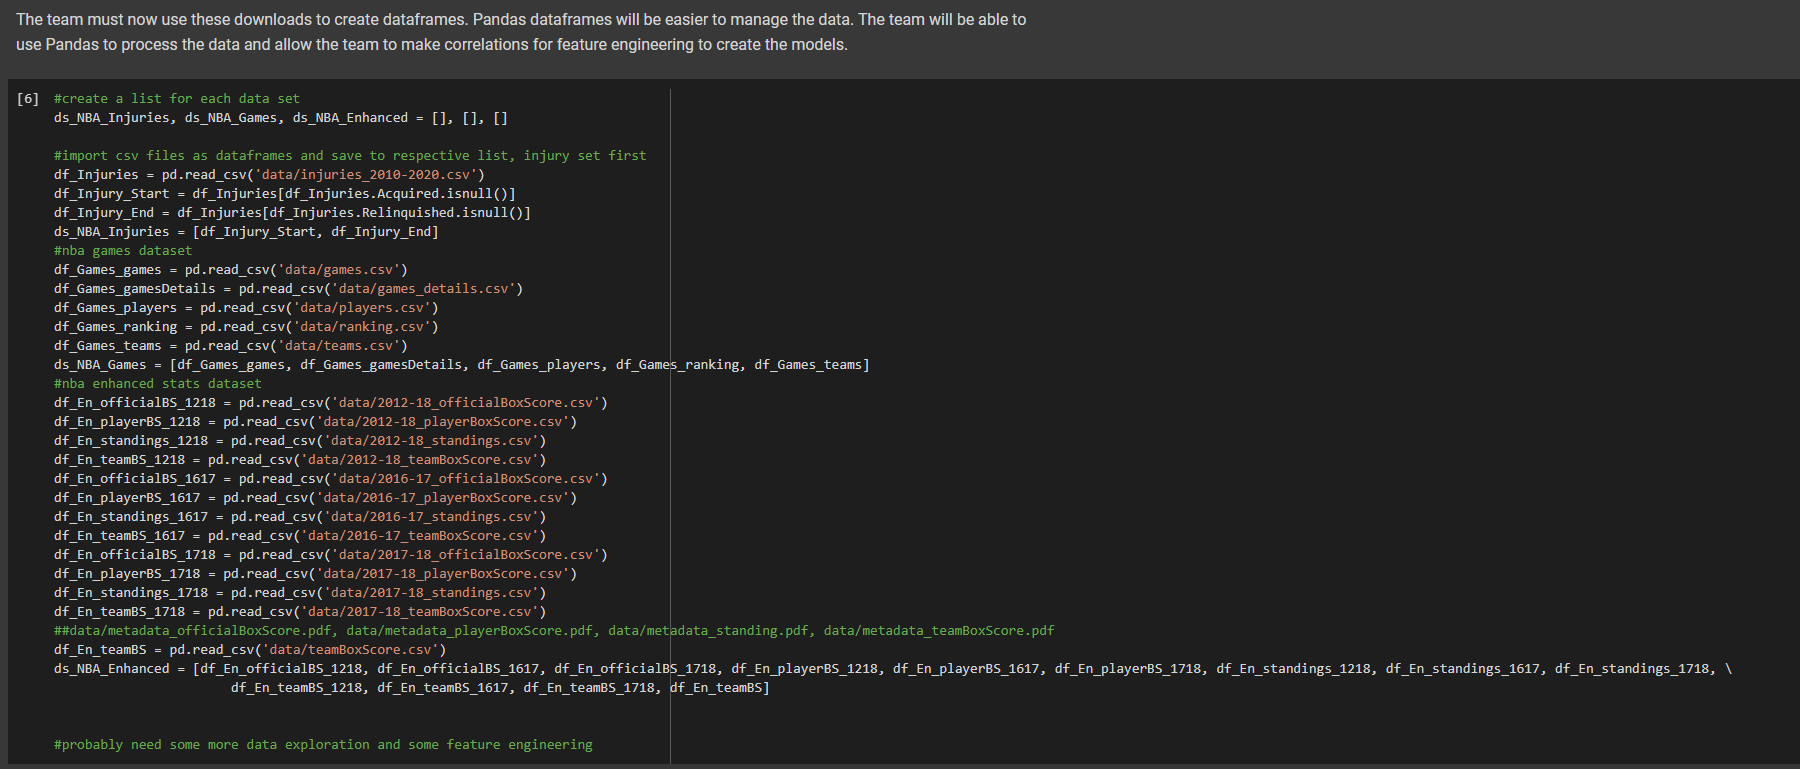

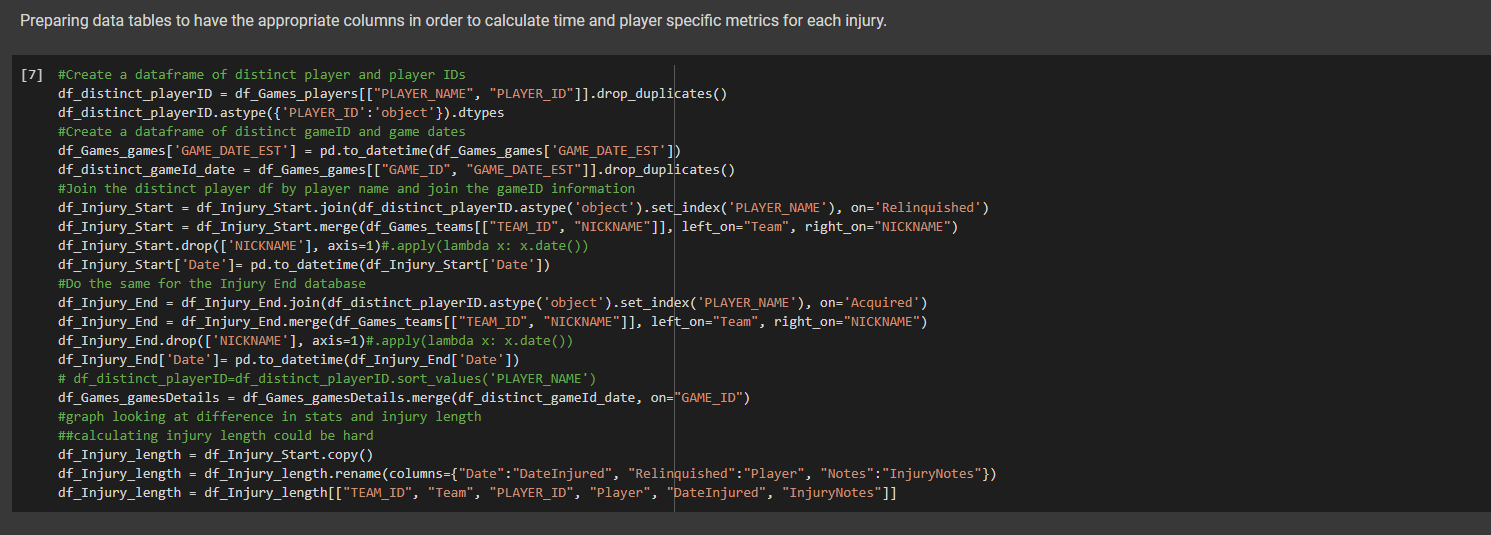

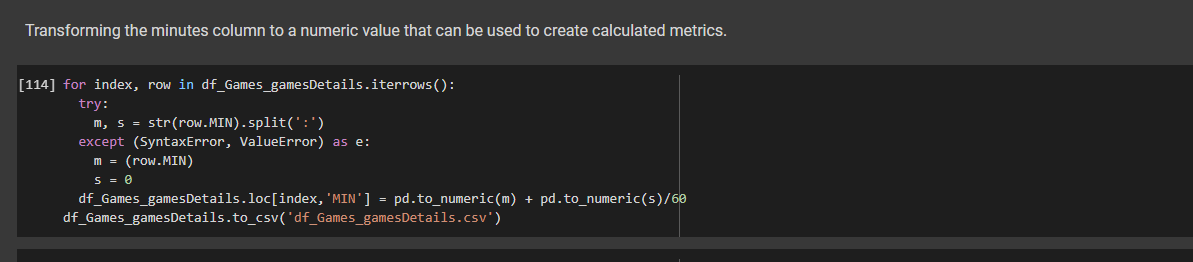

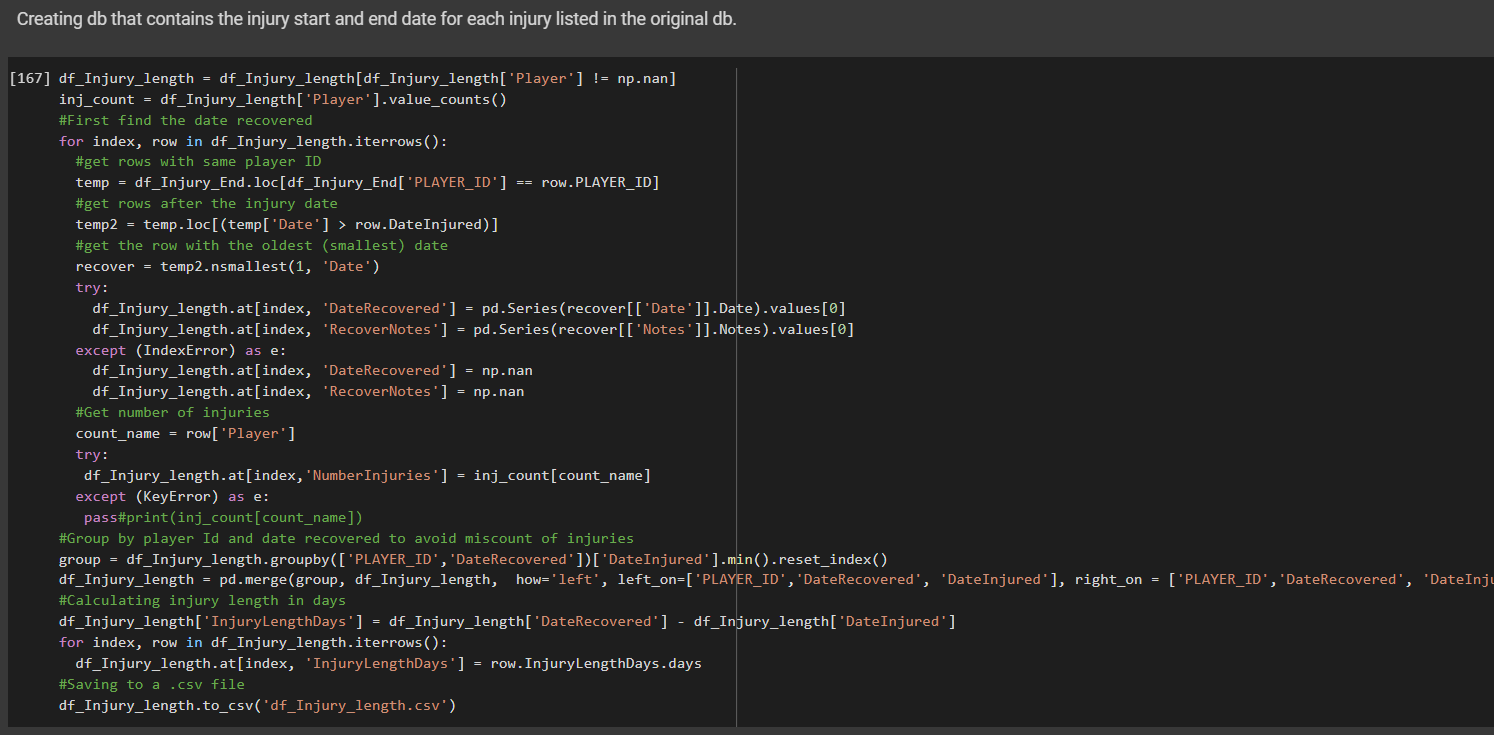

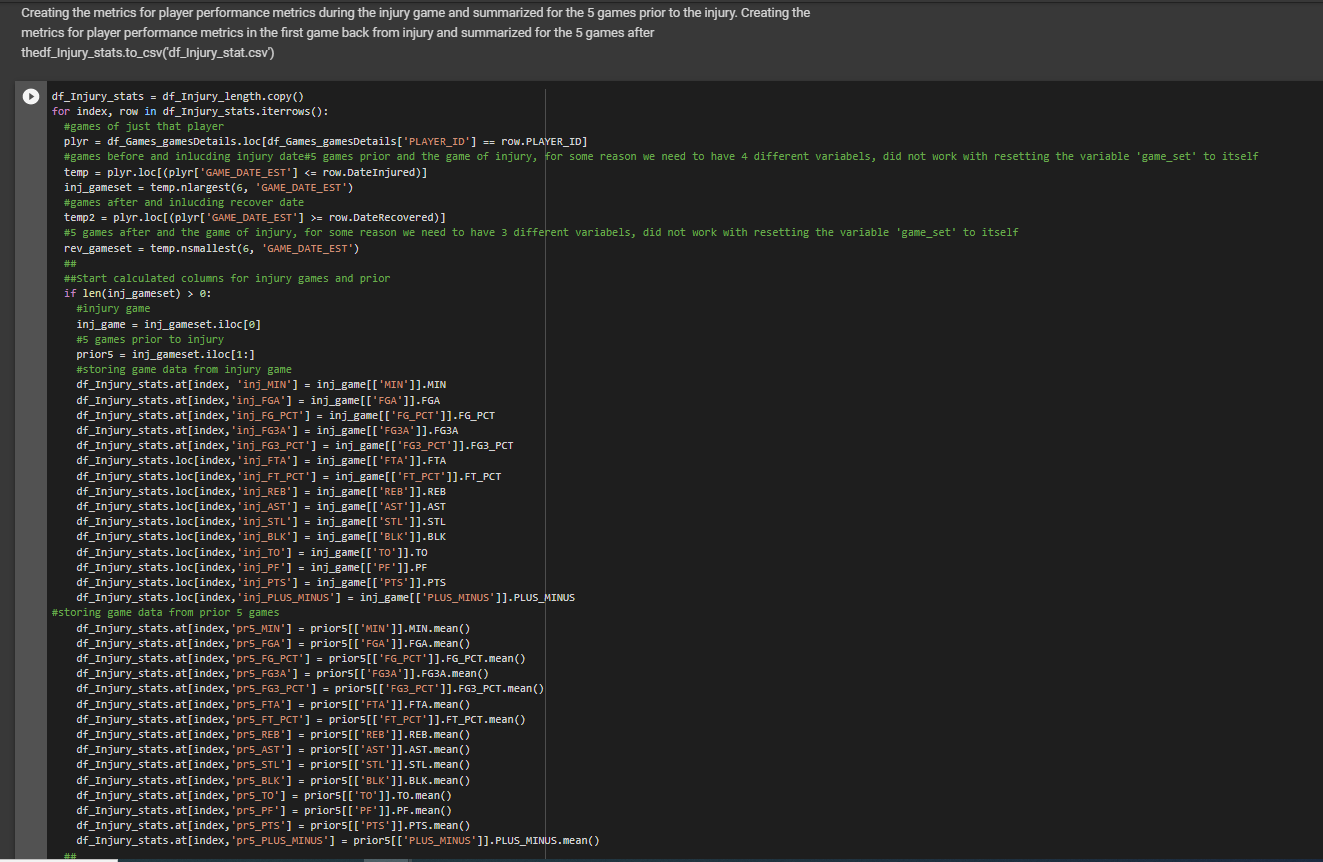

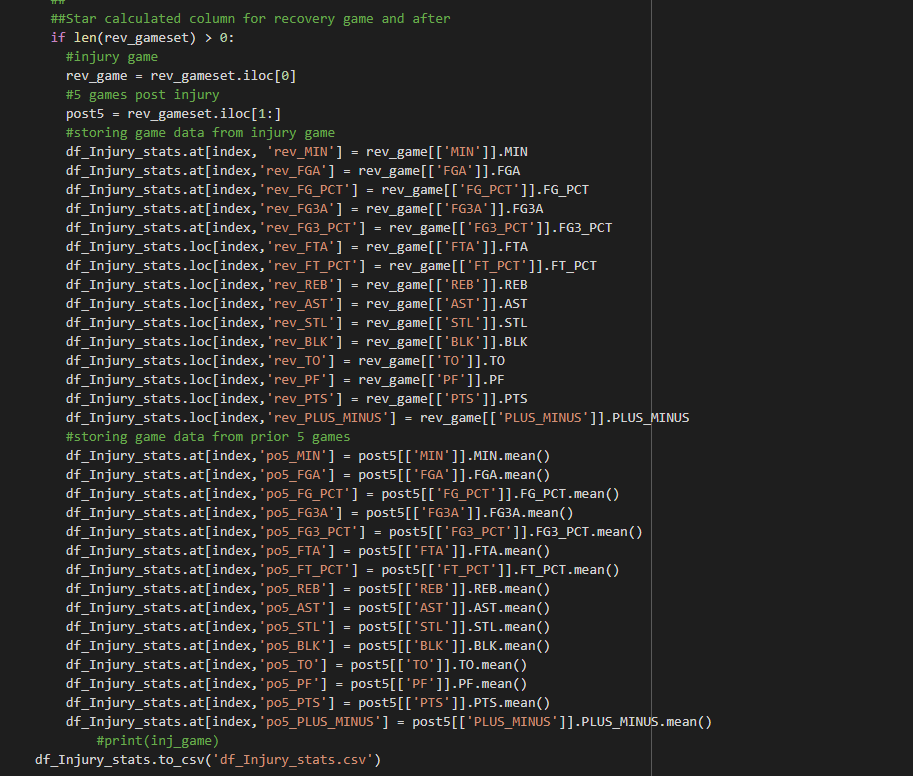

In [3]:
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture1.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture2.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture3.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture4.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture5.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture6.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture7.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture8.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture9.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture10.PNG'))
display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture11.PNG'))


In [4]:
########################################################################
# Load In Conditioned Datasets - Upload to the Colab files on the left #
########################################################################

# df_Injury_length
#df_Injury_length = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_Injury_length.csv') 
df_Injury_length = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/df_Injury_length.csv') 
# df_Injury_stats
#df_Injury_stats = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_Injury_stats.csv') 
df_Injury_stats = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/df_Injury_stats.csv') 

ds_NBA_Injuries = [df_Injury_length, df_Injury_stats]
#nba games dataset
df_Games_games = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/games.csv')
df_Games_gamesDetails = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/df_Games_gamesDetails.csv')
df_Games_players = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/players.csv')
df_Games_ranking = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/ranking.csv')
df_Games_teams = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/teams.csv')
ds_NBA_Games = [df_Games_games, df_Games_gamesDetails, df_Games_players, df_Games_ranking, df_Games_teams]

Data Exploration

In [5]:
df_Injury_length.head()

,Unnamed: 0,PLAYER_ID,DateRecovered,DateInjured,TEAM_ID,Team,Player,InjuryNotes,RecoverNotes,NumberInjuries,InjuryLengthDays
0,0,255,2011-01-14,2011-01-11,1610612756,Suns,Grant Hill,placed on IL with sore/sprained right knee,activated from IL,20.0,3
1,1,255,2013-01-12,2012-01-13,1610612756,Suns,Grant Hill,strained right quadriceps (DNP),activated from IL,20.0,365
2,2,255,2013-04-27,2013-04-25,1610612746,Clippers,Grant Hill,placed on IL,activated from IL,20.0,2
3,3,406,2010-11-11,2010-11-02,1610612738,Celtics,Shaquille O'Neal,placed on IL with bruised right knee,activated from IL,17.0,9
4,4,406,2011-04-03,2010-12-09,1610612738,Celtics,Shaquille O'Neal,sore right calf (P) / sore left knee (CBC) (DNP),activated from IL,17.0,115


In [6]:
df_Injury_stats.head()


,Unnamed: 0,PLAYER_ID,DateRecovered,DateInjured,TEAM_ID,Team,Player,InjuryNotes,RecoverNotes,NumberInjuries,InjuryLengthDays,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,pr5_MIN,pr5_FGA,pr5_FG_PCT,pr5_FG3A,pr5_FG3_PCT,pr5_FTA,pr5_FT_PCT,pr5_REB,pr5_AST,pr5_STL,pr5_BLK,pr5_TO,pr5_PF,pr5_PTS,pr5_PLUS_MINUS,rev_MIN,rev_FGA,rev_FG_PCT,rev_FG3A,rev_FG3_PCT,rev_FTA,rev_FT_PCT,rev_REB,rev_AST,rev_STL,rev_BLK,rev_TO,rev_PF,rev_PTS,rev_PLUS_MINUS,po5_MIN,po5_FGA,po5_FG_PCT,po5_FG3A,po5_FG3_PCT,po5_FTA,po5_FT_PCT,po5_REB,po5_AST,po5_STL,po5_BLK,po5_TO,po5_PF,po5_PTS,po5_PLUS_MINUS
0,0,255,2011-01-14,2011-01-11,1610612756,Suns,Grant Hill,placed on IL with sore/sprained right knee,activated from IL,20.0,3,4.116667,2.0,0.500,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,2.0,-5.0,30.503333,10.6,0.4674,1.0,0.2000,3.4,0.8668,4.0,3.0,1.2,0.4,1.0,2.6,12.4,-8.0,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75
1,1,255,2013-01-12,2012-01-13,1610612756,Suns,Grant Hill,strained right quadriceps (DNP),activated from IL,20.0,365,7.300000,2.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,-14.0,28.523333,10.6,0.3390,1.4,0.0666,1.8,0.5500,4.0,1.8,1.0,0.8,1.4,2.2,9.4,11.2,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75
2,2,255,2013-04-27,2013-04-25,1610612746,Clippers,Grant Hill,placed on IL,activated from IL,20.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.958333,3.0,0.5000,1.0,0.5000,0.0,0.0000,1.5,0.0,0.0,1.0,0.0,0.5,3.5,-1.5,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75
3,3,406,2010-11-11,2010-11-02,1610612738,Celtics,Shaquille O'Neal,placed on IL with bruised right knee,activated from IL,17.0,9,22.533333,7.0,0.714,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,3.0,10.0,2.0,18.836667,5.2,0.6292,0.0,0.0000,4.0,0.7350,5.2,1.6,0.2,0.8,1.8,3.4,9.0,1.5,31.15,15.0,0.533,0.0,0.0,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.0,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40
4,4,406,2011-04-03,2010-12-09,1610612738,Celtics,Shaquille O'Neal,sore right calf (P) / sore left knee (CBC) (DNP),activated from IL,17.0,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.380000,4.8,0.6394,0.0,0.0000,4.6,0.6000,5.2,1.0,0.2,1.0,1.6,2.8,8.8,7.0,31.15,15.0,0.533,0.0,0.0,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.0,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40


Text(0.5, 1.0, 'Injury Length in Days over Number of Injuries')

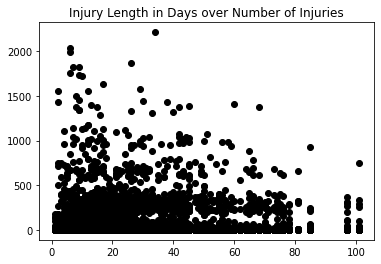

In [7]:
plt.plot(df_Injury_length['NumberInjuries'], df_Injury_length['InjuryLengthDays'], 'o', color='black')
#plt.yticks(np.arange(0, max(df_Injury_length['InjuryLengthDays']), 100.0))
plt.title("Injury Length in Days over Number of Injuries")

Text(0.5, 1.0, 'Injury Length in Days over Avg Minutes Playes in Prior5 games')

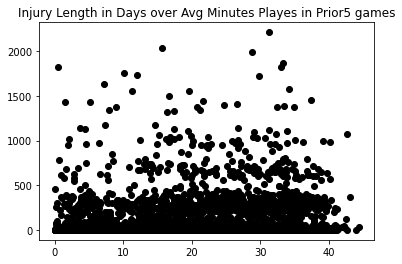

In [9]:
plt.plot(df_Injury_stats['pr5_MIN'], df_Injury_stats['InjuryLengthDays'], 'o', color='black')
#plt.yticks(np.arange(0, 800, 100.0))
plt.title("Injury Length in Days over Avg Minutes Playes in Prior5 games")


Text(0.5, 1.0, 'Frquency of injuries by Avg Minutes Played in Prior 5 games')

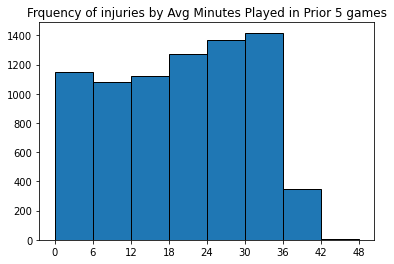

In [10]:
plt.hist(df_Injury_stats['pr5_MIN'], bins=[0, 6, 12, 18, 24, 30, 36, 42, 48], edgecolor='black')
plt.xticks([0, 6, 12, 18, 24, 30, 36, 42, 48])
plt.title("Frquency of injuries by Avg Minutes Played in Prior 5 games")

Text(0.5, 1.0, 'Avg Minutes Played in Post 5 Games over Injury Length in Days')

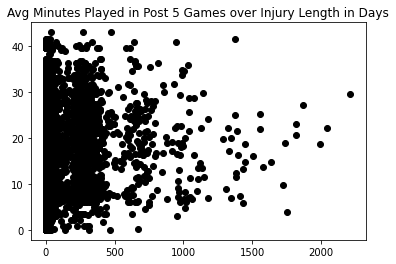

In [12]:
plt.plot(df_Injury_stats['InjuryLengthDays'], df_Injury_stats['po5_MIN'], 'o', color='black')
plt.title("Avg Minutes Played in Post 5 Games over Injury Length in Days")
#####made mistake in engineering file need to fix beofre continue

Text(0.5, 1.0, 'Difference in Avg Minutes Played between Post 5 Games and Prior 5 games over Injury Length in Days')

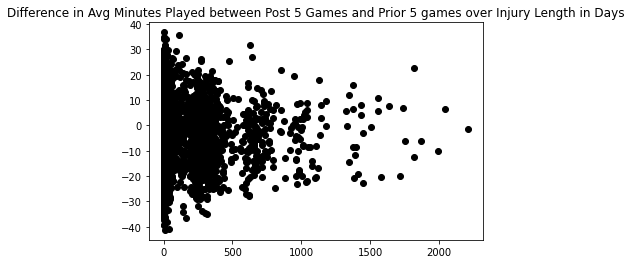

In [15]:
plt.plot(df_Injury_stats['InjuryLengthDays'], (df_Injury_stats['po5_MIN']-df_Injury_stats['pr5_MIN']), 'o', color='black')
plt.title("Difference in Avg Minutes Played between Post 5 Games and Prior 5 games over Injury Length in Days")

In [ ]:
# ########################################################################
# # Load In Conditioned Datasets - Upload to the Colab files on the left #
# ########################################################################

# # df_Injury_End
# df_Injury_End = pd.read_csv("df_Injury_End.csv")  
# # df_Injury_length
# df_Injury_length = pd.read_csv('df_Injury_length.csv') 
# # df_Injury_Start
# df_Injury_Start = pd.read_csv('df_Injury_Start.csv') 

# ds_NBA_Injuries = [df_Injury_Start, df_Injury_End]
# #nba games dataset
# df_Games_games = pd.read_csv('games.csv')
# df_Games_gamesDetails = pd.read_csv('games_details.csv')
# df_Games_players = pd.read_csv('players.csv')
# df_Games_ranking = pd.read_csv('ranking.csv')
# df_Games_teams = pd.read_csv('teams.csv')
# ds_NBA_Games = [df_Games_games, df_Games_gamesDetails, df_Games_players, df_Games_ranking, df_Games_teams]

## We are now ready to structure our dataframes

The team must now use these downloads to create dataframes. Pandas dataframes will be easier to manage the data. The team will be able to use Pandas to process the data and allow the team to make correlations for feature engineering to create the models.

# Part 2 Building the Models

A link for Keras for us to use can be found [here](https://keras.io/guides/sequential_model/). We are first going to set up our Benchmark Test to be used when we are Benchmarking our model.

In [ ]:
def b():
  Benchmark.Start()
  print ("b")
  import time
  time.sleep(3)
  Benchmark.Stop()

def c():
  Benchmark.Start()
  print ("c")
  import time
  time.sleep(1)
  Benchmark.Stop()

In [ ]:
 b()
 c()

 Benchmark.print()

b
c

+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                       

Now that we know which GPU we are using, we can get into the actual work. The following is building our Keras model.

In [ ]:
np.random.seed(23)
warnings.filterwarnings("ignore")

In [ ]:
df_Injury_End_fillna = df_Injury_End.copy()

In [ ]:
cols = ['Date', 'Team', 'Acquired', 'Relinquished', 'Notes', 'TEAM_ID', 'NICKNAME']
df_Injury_End_fillna = df_Injury_End_fillna.drop(cols, 1)

In [ ]:
############## Need to work here more. The Fill NA command isn't taking out NaNs ############

df_Injury_End_fillna = df_Injury_End_fillna.fillna(df_Injury_End_fillna.mean())

In [ ]:
df_Injury_End_fillna.head()

,Unnamed: 0,PLAYER_ID,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,p5_MIN,p5_FGA,p5_FG_PCT,p5_FG3A,p5_FG3_PCT,p5_FTA,p5_FT_PCT,p5_REB,p5_AST,p5_STL,p5_BLK,p5_TO,p5_PF,p5_PTS,p5_PLUS_MINUS
0,0,711.0,5.0,7.0,0.714,2.0,0.5,2.0,1.000,2.0,6.0,1.0,0.0,0.0,2.0,13.0,-1.3182,29.590000,12.6,0.3816,2.8,0.4666,6.4,0.6654,3.6,4.6,1.2,0.0,2.8,2.0,15.8,6.750000
1,1,2048.0,5.0,5.0,0.400,0.0,0.0,6.0,0.667,7.0,1.0,1.0,0.0,3.0,3.0,8.0,-1.3182,30.606667,8.6,0.4712,0.0,0.0000,2.8,0.3666,6.4,0.6,0.8,0.8,2.4,3.4,10.6,-5.600000
2,2,201596.0,24.0,3.0,0.333,2.0,0.5,2.0,0.500,3.0,3.0,2.0,0.0,4.0,5.0,4.0,-1.3182,22.000000,5.8,0.4332,3.0,0.2166,1.8,0.3334,3.2,3.4,1.0,0.0,1.8,3.8,7.2,-0.825948
3,3,436.0,5.0,2.0,0.500,0.0,0.0,4.0,1.000,3.0,0.0,1.0,0.0,3.0,3.0,6.0,-1.3182,30.100000,12.6,0.3678,0.2,0.0000,4.8,0.7666,8.6,1.4,0.8,0.2,2.4,3.2,12.4,-2.750000
4,4,2048.0,5.0,5.0,0.400,0.0,0.0,6.0,0.667,7.0,1.0,1.0,0.0,3.0,3.0,8.0,-1.3182,30.606667,8.6,0.4712,0.0,0.0000,2.8,0.3666,6.4,0.6,0.8,0.8,2.4,3.4,10.6,-5.600000


In [ ]:
df_baseline = df_Injury_End_fillna.copy()
sort_by = 'PLAYER_ID'

#df_baseline.sort_values(by=['Date','Name']).reset_index(drop=True, inplace=True)
df_baseline.sort_values(by=[sort_by]).reset_index(drop=True, inplace=True)
# df_baseline['FPTS_pred'] = utils.calculate_FPTS(df_baseline)

# # Season average
# print(' MAE | ', utils.calculate_MAE(df_baseline['FPTS_pred'], df_baseline['FPTS']))
# print('RMSE | ', utils.calculate_RMSE(df_baseline['FPTS_pred'], df_baseline['FPTS']))

In [ ]:
df_baseline.head()

,Unnamed: 0,PLAYER_ID,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,p5_MIN,p5_FGA,p5_FG_PCT,p5_FG3A,p5_FG3_PCT,p5_FTA,p5_FT_PCT,p5_REB,p5_AST,p5_STL,p5_BLK,p5_TO,p5_PF,p5_PTS,p5_PLUS_MINUS
0,0,711.0,5.0,7.0,0.714,2.0,0.5,2.0,1.000,2.0,6.0,1.0,0.0,0.0,2.0,13.0,-1.3182,29.590000,12.6,0.3816,2.8,0.4666,6.4,0.6654,3.6,4.6,1.2,0.0,2.8,2.0,15.8,6.750000
1,1,2048.0,5.0,5.0,0.400,0.0,0.0,6.0,0.667,7.0,1.0,1.0,0.0,3.0,3.0,8.0,-1.3182,30.606667,8.6,0.4712,0.0,0.0000,2.8,0.3666,6.4,0.6,0.8,0.8,2.4,3.4,10.6,-5.600000
2,2,201596.0,24.0,3.0,0.333,2.0,0.5,2.0,0.500,3.0,3.0,2.0,0.0,4.0,5.0,4.0,-1.3182,22.000000,5.8,0.4332,3.0,0.2166,1.8,0.3334,3.2,3.4,1.0,0.0,1.8,3.8,7.2,-0.825948
3,3,436.0,5.0,2.0,0.500,0.0,0.0,4.0,1.000,3.0,0.0,1.0,0.0,3.0,3.0,6.0,-1.3182,30.100000,12.6,0.3678,0.2,0.0000,4.8,0.7666,8.6,1.4,0.8,0.2,2.4,3.2,12.4,-2.750000
4,4,2048.0,5.0,5.0,0.400,0.0,0.0,6.0,0.667,7.0,1.0,1.0,0.0,3.0,3.0,8.0,-1.3182,30.606667,8.6,0.4712,0.0,0.0000,2.8,0.3666,6.4,0.6,0.8,0.8,2.4,3.4,10.6,-5.600000


In [ ]:
#df_baseline.sort_values(by=['Date','Name']).reset_index(drop=True, inplace=True)
df_baseline.sort_values(by=[sort_by]).reset_index(drop=True, inplace=True)


# df_baseline['	PLAYER_ID'] = utils.calculate_FPTS(df_baseline)

# # Season average
# print(' MAE | ', utils.calculate_MAE(df_baseline['FPTS_pred'], df_baseline['FPTS']))
# print('RMSE | ', utils.calculate_RMSE(df_baseline['FPTS_pred'], df_baseline['FPTS']))

# Part No X. Building the Model

The team is now moving on to building the model for the baseline. Linear Regression can be used to model the values. Additionally, a Random Forest modeling function was used to verify model performance. 

The pipeline will be built off of using df_baseline.p5_PLUS_MINUS. To change the data going into the model, the team had to modify the dataframe input to get to the results. Comments were put around to make it easy to find the code in the Notebook.

In [ ]:
#df_baseline = df_baseline
# basic =  ['PTS','3P','AST','TRB','STL','BLK','TOV', 'DD', 'TD']

###################################
##                               ##
##     INSERT CODE               ##
##                               ##
##     Change DF before here     ##
##                               ##
##                               ##
##                               ##
###################################

X = df_baseline

In [ ]:
X.head()

,Unnamed: 0,PLAYER_ID,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,p5_MIN,p5_FGA,p5_FG_PCT,p5_FG3A,p5_FG3_PCT,p5_FTA,p5_FT_PCT,p5_REB,p5_AST,p5_STL,p5_BLK,p5_TO,p5_PF,p5_PTS,p5_PLUS_MINUS
0,0,711.0,5.0,7.0,0.714,2.0,0.5,2.0,1.000,2.0,6.0,1.0,0.0,0.0,2.0,13.0,-1.3182,29.590000,12.6,0.3816,2.8,0.4666,6.4,0.6654,3.6,4.6,1.2,0.0,2.8,2.0,15.8,6.750000
1,1,2048.0,5.0,5.0,0.400,0.0,0.0,6.0,0.667,7.0,1.0,1.0,0.0,3.0,3.0,8.0,-1.3182,30.606667,8.6,0.4712,0.0,0.0000,2.8,0.3666,6.4,0.6,0.8,0.8,2.4,3.4,10.6,-5.600000
2,2,201596.0,24.0,3.0,0.333,2.0,0.5,2.0,0.500,3.0,3.0,2.0,0.0,4.0,5.0,4.0,-1.3182,22.000000,5.8,0.4332,3.0,0.2166,1.8,0.3334,3.2,3.4,1.0,0.0,1.8,3.8,7.2,-0.825948
3,3,436.0,5.0,2.0,0.500,0.0,0.0,4.0,1.000,3.0,0.0,1.0,0.0,3.0,3.0,6.0,-1.3182,30.100000,12.6,0.3678,0.2,0.0000,4.8,0.7666,8.6,1.4,0.8,0.2,2.4,3.2,12.4,-2.750000
4,4,2048.0,5.0,5.0,0.400,0.0,0.0,6.0,0.667,7.0,1.0,1.0,0.0,3.0,3.0,8.0,-1.3182,30.606667,8.6,0.4712,0.0,0.0000,2.8,0.3666,6.4,0.6,0.8,0.8,2.4,3.4,10.6,-5.600000


In [ ]:
X = X.values.reshape(-1, 1)
# X = X.reshape(-1, 1)


# X = df_baseline.loc[:, basic]
X = MinMaxScaler().fit_transform(X)
print(X.shape)
# Y = df_baseline['FPTS'].values.reshape(-1,1).flatten()
Y = df_baseline.values.reshape(-1,1).flatten() # Y is 38 times larger. Not sure what I did here. 
Y = Y.reshape(-1, 1) 

size_x = X.shape[0]
size_y = Y.shape[0]
size_y = int(size_y/size_x)
print(size_y)

Y = Y.reshape((size_x, size_y)) # Y is 29 times larger. Not sure what I did here. 



print(X.shape)
print(Y.shape)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


lin_reg = LinearRegression()
# rf=RandomForestClassifier(max_depth=8,n_estimators=5)

# scores = cross_validate(lasso, X, Y, cv=3, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)


reg_cv_score=cross_val_score(estimator=lin_reg,X=X_train,y=Y_train,cv=5)
print(reg_cv_score) # Prints a bunch of NaNs currently.

# errors = utils.cross_val(reg, X, y, n_folds=5, verbose=0)
# utils.summarize_errors(errors)

(295040, 1)
1
(295040, 1)
(295040, 1)
[1. 1. 1. 1. 1.]


The model has been built and trained on 2/3 of the data with a test on 1/3 of the data. 

In [ ]:
# When the dataframes are combined, use this code to select features.

# features = ['SG', 'F', 'C', 'PTS', '3P', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'DD', 'TD', 'MP', 'FT',
#             'FTA', 'FGA', '3PA', 'DRB', 'ORB', 'USG_perc', 'DRtg', 'ORtg', 'AST_perc', 'DRB_perc',
#             'ORB_perc', 'BLK_perc', 'TOV_perc', 'STL_perc', 'eFG_perc', 'FG_perc', '3P_perc', 'FT_perc']


features = ['inj_FGA',	'inj_FG_PCT',	'inj_FG3A',	'inj_FG3_PCT',	'inj_FTA',	'inj_FT_PCT',	'inj_REB',	'inj_AST',	'inj_STL',	
            'inj_BLK',	'inj_TO',	'inj_PF', 'inj_PTS',	'inj_PLUS_MINUS',	'p5_MIN',	
            'p5_FGA',	'p5_FG_PCT', 	'p5_FG3A', 	'p5_FG3_PCT',	'p5_FTA',	'p5_FT_PCT',	'p5_REB',
            'p5_AST',	'p5_STL',	'p5_BLK',	'p5_TO',	'p5_PF',	'p5_PTS',	'p5_PLUS_MINUS']

In [ ]:
# _all = ['Salary', 'Rest', 'Rota_All', 'Rota_Pos', 'Home', 'SG', 'F', 'C', 'Value', 'FPTS_std',
#         'PTS', '3P', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'DD', 'TD', 'MP', 'FT', 'FTA', 'FGA', '3PA', 'DRB',
#         'ORB', 'USG_perc', 'DRtg', 'ORtg', 'AST_perc', 'DRB_perc', 'ORB_perc', 'BLK_perc', 'TOV_perc', 
#         'STL_perc', 'eFG_perc', 'FG_perc', '3P_perc', 'FT_perc']
_all  = ['inj_FGA',	'inj_FG_PCT',	'inj_FG3A',	'inj_FG3_PCT',	'inj_FTA',	'inj_FT_PCT',	'inj_REB',	'inj_AST',	'inj_STL',	
            'inj_BLK',	'inj_TO',	'inj_PF', 'inj_PTS',	'inj_PLUS_MINUS',	'p5_MIN',	
            'p5_FGA',	'p5_FG_PCT', 	'p5_FG3A', 	'p5_FG3_PCT',	'p5_FTA',	'p5_FT_PCT',	'p5_REB',
            'p5_AST',	'p5_STL',	'p5_BLK',	'p5_TO',	'p5_PF',	'p5_PTS',	'p5_PLUS_MINUS']

In [ ]:
df_Injury_End_fillna.head()

,Unnamed: 0,PLAYER_ID,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,p5_MIN,p5_FGA,p5_FG_PCT,p5_FG3A,p5_FG3_PCT,p5_FTA,p5_FT_PCT,p5_REB,p5_AST,p5_STL,p5_BLK,p5_TO,p5_PF,p5_PTS,p5_PLUS_MINUS
0,0,711.0,5.0,7.0,0.714,2.0,0.5,2.0,1.000,2.0,6.0,1.0,0.0,0.0,2.0,13.0,-1.3182,29.590000,12.6,0.3816,2.8,0.4666,6.4,0.6654,3.6,4.6,1.2,0.0,2.8,2.0,15.8,6.750000
1,1,2048.0,5.0,5.0,0.400,0.0,0.0,6.0,0.667,7.0,1.0,1.0,0.0,3.0,3.0,8.0,-1.3182,30.606667,8.6,0.4712,0.0,0.0000,2.8,0.3666,6.4,0.6,0.8,0.8,2.4,3.4,10.6,-5.600000
2,2,201596.0,24.0,3.0,0.333,2.0,0.5,2.0,0.500,3.0,3.0,2.0,0.0,4.0,5.0,4.0,-1.3182,22.000000,5.8,0.4332,3.0,0.2166,1.8,0.3334,3.2,3.4,1.0,0.0,1.8,3.8,7.2,-0.825948
3,3,436.0,5.0,2.0,0.500,0.0,0.0,4.0,1.000,3.0,0.0,1.0,0.0,3.0,3.0,6.0,-1.3182,30.100000,12.6,0.3678,0.2,0.0000,4.8,0.7666,8.6,1.4,0.8,0.2,2.4,3.2,12.4,-2.750000
4,4,2048.0,5.0,5.0,0.400,0.0,0.0,6.0,0.667,7.0,1.0,1.0,0.0,3.0,3.0,8.0,-1.3182,30.606667,8.6,0.4712,0.0,0.0000,2.8,0.3666,6.4,0.6,0.8,0.8,2.4,3.4,10.6,-5.600000


In [ ]:
df_baseline = df_Injury_End_fillna.copy()
sort_by = 'PLAYER_ID'

In [ ]:
### Keeps Passing error of ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
### This should work when we start passing numbers. It will help pick best features.

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)




# df_baseline = clean_dataset(df_baseline)
# #df_baseline.sort_values(by=['Date','Name']).reset_index(drop=True, inplace=True)
# df_baseline.sort_values(by=[sort_by]).reset_index(drop=True, inplace=True)

# print(df_baseline.head)

X = df_baseline
X = X.values.reshape(-1, 1)
# X was called above

# X = MinMaxScaler().fit_transform(X)
# y = df_features['FPTS'].values.reshape(-1,1).flatten()
print(X)

Y = df_baseline.values.reshape(-1,1).flatten() # Y is 38 times larger. Not sure what I did here. 
Y = Y.reshape(-1, 1) 

print(X.shape)
print(Y.shape)

size_x = X.shape[0]
size_y = Y.shape[0]
size_y = int(size_y/size_x)
print(size_y)

Y = Y.reshape((size_x, size_y))
# Y = Y.reshape((16894, 38)) # Y is 38 times larger. Not sure what I did here. 

# Takes 2 minutes
# clf.set_params(n_estimators=2000)
# clf.fit(X, y, sample_weight=train_weight)

model = GradientBoostingRegressor()
model.fit(X, Y)

top_features = pd.Series(model.feature_importances_, index = _all).sort_values()
top_features.plot(kind = "barh", figsize=(15,10) ,title='Top Features')
plt.show()

[[  0.  ]
 [711.  ]
 [  5.  ]
 ...
 [  2.5 ]
 [ 24.75]
 [  3.5 ]]
(295040, 1)
(295040, 1)
1


ValueError: ignored

In [ ]:

# lightgbm for regression

X = df_baseline
# X_scrub = df_baseline

# mean_X = np.mean(X_scrub)
# for i in  range(len(X_scrub)):
#   # print(mean_X)
#   X[i] = X_scrub[i]

# X = X.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)

Y = df_baseline.values.reshape(-1,1).flatten() # Y is 38 times larger. Not sure what I did here. 
Y = Y.reshape(-1, 1) 

size_x = X.shape[0]
size_y = Y.shape[0]
size_y = int(size_y/size_x)
print(size_y)
Y = Y.reshape((size_x, size_y))

print("X Shape is ",X.shape)
print("Y Shape is ",Y.shape)

# Neat code from other write-up. This creates a dataset to define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# evaluate the model
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

### Searched Online. I need to use the TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(binary=True)
# Y = tfidf.fit_transform(Y)

print("X Shape is ",X.shape)
print("Y Shape is ",Y.shape)

# print("Y Shape is ",Y.shape)

# n_scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on the whole dataset
# model = LGBMRegressor()
model.fit(X, Y)

# make a single prediction. Code example is below:
# row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
# yhat = model.predict(row)
# print('Prediction: %.3f' % yhat[0])

1
X Shape is  (295040, 1)
Y Shape is  (295040, 1)
X Shape is  (295040, 1)
Y Shape is  (295040, 1)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# omit_lowest = 20
# _selected = list(top_features[omit_lowest:].index)

# Building the Keras Model

In [ ]:
df_baseline = df_Injury_End_fillna.copy()
sort_by = 'PLAYER_ID'

In [ ]:
tf.keras.backend.set_floatx('float64')

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)


x = df_baseline
X = X.values.reshape(-1, 1)

# x = tf.ones((3, 3))
Y = model(X)

print(Y)

tf.Tensor(
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.71412435e+01 2.03400406e+01 1.08151455e+02 1.48975821e+02]
 [6.83131107e-01 1.43038260e-01 7.60558756e-01 1.04764993e+00]
 ...
 [3.41565554e-01 7.15191301e-02 3.80279378e-01 5.23824967e-01]
 [3.38149898e+00 7.08039388e-01 3.76476584e+00 5.18586718e+00]
 [4.78191775e-01 1.00126782e-01 5.32391130e-01 7.33354954e-01]], shape=(295040, 4), dtype=float64)


Insert Layers

In [ ]:
df_baseline = df_Injury_End_fillna.copy()
sort_by = 'PLAYER_ID'

In [ ]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
X = df_baseline
X = X.values.reshape(-1, 1)

Y = layer3(layer2(layer1(X)))
print(Y)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(295040, 4), dtype=float64)


# Part 3 Conclusions

This is where the conclusions section will be typed